In [34]:
import py_xydual
import numpy
from matplotlib import pyplot
from tqdm.notebook import tqdm
import scipy.special

In [35]:
def pots(inv_k, N=32):
    return [inv_k * n**2 for n in range(N)]

def v_tilde(ns, k):
    return - numpy.log(scipy.special.iv(ns, k) / scipy.special.iv(0, k))

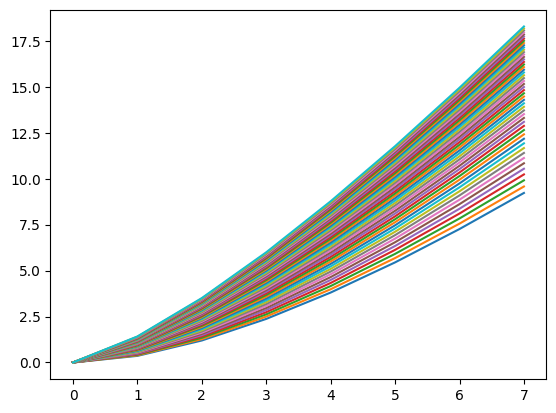

In [36]:
for inv_k in numpy.linspace(0.5,2.0):
    pyplot.plot(numpy.arange(8), v_tilde(numpy.arange(8), 1.0/inv_k))
pyplot.show()

In [3]:
Ls = numpy.arange(4,16,4)

data = {}

for L in tqdm(Ls):
    all_es = []

    inv_ks = numpy.linspace(0.5,1.5, 64)
    for inv_k in tqdm(inv_ks, leave=False):
        lat = py_xydual.PyLattice(L,L,pots(inv_k),experiments=16)
        lat.update(100)
        energies = lat.simulate_and_get_energy(1000, 100)
        all_es.append(energies)

    all_es = numpy.array(all_es)
    data[L] = all_es

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

In [6]:
data[4].shape

(64, 1000, 16)

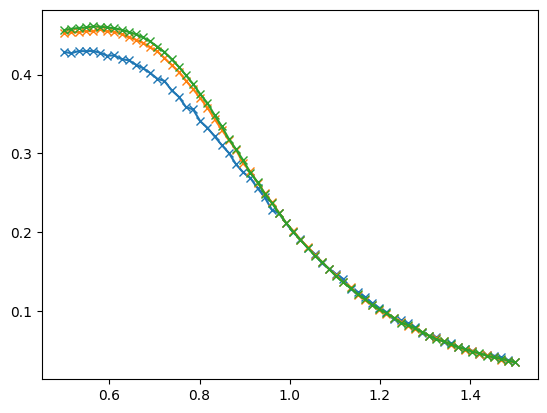

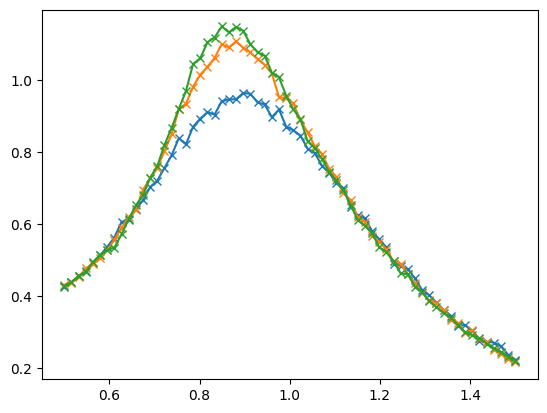

In [9]:
for L, all_es in data.items():
    pyplot.plot(inv_ks, all_es.mean(axis=(1,2)) / L**2, 'x-')
pyplot.show()
for L, all_es in data.items():
    pyplot.plot(inv_ks, all_es.var(axis=(1,2)) / L**2, 'x-')
pyplot.show()